In [2]:
%matplotlib inline
import numpy as np
from numpy.random import rand
import matplotlib.pyplot as plt

In [3]:
def inicial(N):   
    '''genera una configuración de espines (+1) y (-1) en una red cuadrada de NxN'''
    estado = 2*np.random.randint(2, size=(N,N))-1
    return estado

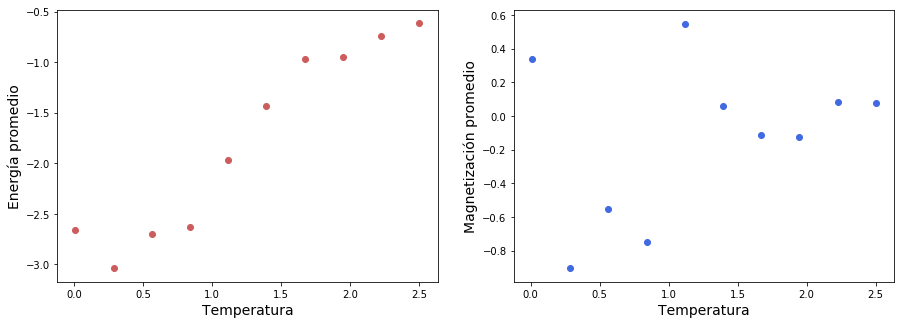

In [51]:
N = 10        #  tamaño de la red N x N
t = 20000     #  número de pasos mc
kB= 1         #  Constante de Boltzmann
J = 1         #  Constante de interacción entre espines

nt=10         # Números de puntos de temperatura
T=np.linspace(0.01,2.5,nt)

Temperatura = []
Energia_prom = []
Magnetizacion_prom = []
for d in range(len(T)):
    config = inicial(N)
    Temperatura.append(T[d])
    beta=1/(kB*T[d])
    Pasos = []
    Energia = []
    Magnetizacion = []
    for k in range(t):
        Pasos.append(k)
        a = np.random.randint(0, N-1)
        b = np.random.randint(0, N-1)
        s =  config[a, b]
        nb = config[(a+1),b] + config[a,(b+1)] + config[(a-1),b] + config[a,(b-1)]
        delta_E = s*nb
        if delta_E < 0:
            s *= -1
        elif rand() < np.exp(-delta_E*beta):
            s *= -1
        config[a, b] = s

    
        energia = 0
        for i in range(N-1):
            for j in range(N-1):
                S = config[i,j]
                nb = config[(i+1), j] + config[i,(j+1)] + config[(i-1), j] + config[i,(j-1)]
                energia += -J*nb*S/(N**2)
        Magnetizacion.append(np.sum(config)/(N**2))
        Energia.append(energia)

    E_p = []
    M_p = []
    for l in range(len(Pasos)):
        if Pasos[l]>15000:            #15000 pasos de estabilización y 5000 para el cálculo del promedio
            E_p.append(Energia[l])
            M_p.append(Magnetizacion[l])

    Energia_prom.append(np.mean(E_p))
    Magnetizacion_prom.append(np.mean(M_p))

    '''
    ############## Gráficas de energía y magnetización contra los pasos del programa ###############
    f = plt.figure(figsize=(15, 5));     
    sp =  f.add_subplot(1, 2, 1 );
    plt.plot(Pasos,Energia, color='IndianRed')
    plt.xlabel("Pasos", fontsize=14);
    plt.ylabel("Energía ", fontsize=14);         
    plt.axis('tight');
    plt.title('T='+'{0:.2f}'.format(T[d]), fontsize=16);
    sp =  f.add_subplot(1, 2, 2 );
    plt.plot(Pasos,Magnetizacion, color='RoyalBlue')
    plt.xlabel("Pasos", fontsize=14); 
    plt.ylabel("Magnetización ", fontsize=14);   
    plt.axis('tight');
    plt.title('T='+'{0:.2f}'.format(T[d]), fontsize=16);
    plt.savefig('Evst'+'{0:.2f}'.format(T[d])+'.png',dpi=199, bbox_inches='tight')
    ################################################################################################
    #'''
#print(Energia_prom,Magnetizacion_prom)
#'''
############## Gráficas de energía y magnetización contra los pasos del programa ###############
g = plt.figure(figsize=(15, 5));     
sp =  g.add_subplot(1, 2, 1 );
plt.scatter(Temperatura,Energia_prom, color='IndianRed')
plt.xlabel("Temperatura", fontsize=14);
plt.ylabel("Energía promedio", fontsize=14);         
plt.axis('tight');
sp =  g.add_subplot(1, 2, 2 );
plt.scatter(Temperatura,Magnetizacion_prom, color='RoyalBlue')
plt.xlabel("Temperatura", fontsize=14); 
plt.ylabel("Magnetización promedio", fontsize=14);   
plt.axis('tight');
plt.savefig('nt'+str(nt)+'.png',dpi=199, bbox_inches='tight')
################################################################################################
#'''